# TWITTER SENTIMENT ANALYSIS ON BIGTECH COMPANIES

## Data Exploratory

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_twit = pd.read_csv("dataset/bigtech.csv")
data_twit.head(10)

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-07-12 09:24:26,AMD,25,114,AMD,United Kingdom,0.0,moffphcgaming,#AMD,Been on holiday so back now. Gonna try get som...,1.282244e+18,🕹MoffPHC Gaming🕹,-0.3102,Technology,AMD
1,2020-07-12 09:09:36,AMD,159,1144,AMD,digitalverse,4.0,ironparr0t,#AMD,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,1.282241e+18,ironparrot,0.0000,Technology,AMD
2,2020-07-12 08:37:31,AMD,4931,7,AMD,NaN,0.0,ASUS_ROG_IN,#AMD,The Beast #StrixGA35 comes packed with Up to A...,1.282233e+18,ASUS ROG IN,0.0000,Technology,AMD
3,2020-07-12 08:31:24,AMD,9,188,AMD,HAHA no....,0.0,XApochrypha,#AMD,Recently purchased everything for my first per...,1.282231e+18,XenosApochrypha,0.0000,Technology,AMD
4,2020-07-12 08:16:45,AMD,1719,1,AMD,digitalocean,1.0,LinuxDreams,#AMD,RT @LinuxReviews: #Linux architect Linus Torva...,1.282227e+18,LinuxDreams,-0.3612,Technology,AMD
5,2020-07-12 08:16:44,AMD,394,4,AMD,NaN,3.0,botxboxseriesx,#AMD,RT @RedGamingTech: #Zen 3 #EPYC Milan Sample L...,1.282227e+18,botxboxseriesx,-0.3400,Technology,AMD
6,2020-07-12 08:12:33,AMD,19,146,AMD,NaN,3.0,Tippy_Power,#AMD,RT @RedGamingTech: #Zen 3 #EPYC Milan Sample L...,1.282226e+18,Tippy,-0.3400,Technology,AMD
7,2020-07-12 08:11:41,AMD,69,135,AMD,Amsterdam,1.0,LinuxReviews,#AMD,"#Linux architect Linus Torvalds: AVX512 Is ""A ...",1.282226e+18,LinuxReviews,-0.3612,Technology,AMD
8,2020-07-12 07:50:29,AMD,520,293,AMD,Wolverhampton,3.0,Wolves_LOC,#AMD,RT @CollegeOptomUK: #ResearchWednesday: Lookin...,1.282221e+18,WolvesLOC,0.0000,Technology,AMD
9,2020-07-12 07:30:05,AMD,369,899,AMD,NaN,0.0,cnxplayer,#AMD,Cast videos from Windows 10 PC and Surface to ...,1.282216e+18,CnX Player,0.4019,Technology,AMD


In [2]:
#checking data dimension
data_twit.shape

(866909, 15)

In [3]:
#Mencheck jumlah feature
data_twit.columns

Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'],
      dtype='object')

In [3]:
#Deskripsi data
data_twit.describe

<bound method NDFrame.describe of                  created_at file_name  followers  friends group_name  \
0       2020-07-12 09:24:26       AMD         25      114        AMD   
1       2020-07-12 09:09:36       AMD        159     1144        AMD   
2       2020-07-12 08:37:31       AMD       4931        7        AMD   
3       2020-07-12 08:31:24       AMD          9      188        AMD   
4       2020-07-12 08:16:45       AMD       1719        1        AMD   
...                     ...       ...        ...      ...        ...   
866904  2020-08-10 08:23:34    Amazon       4237      997     Amazon   
866905  2020-08-10 08:22:43    Amazon        252      519     Amazon   
866906  2020-08-10 08:22:12    Amazon       1301     1188     Amazon   
866907  2020-08-10 08:21:37    Amazon      12425    10646     Amazon   
866908  2020-08-10 08:20:38    Amazon        445       79     Amazon   

                           location  retweet_count     screenname  \
0                    United King

In [4]:
#Mencheck korelasi antar features
correlations = data_twit.corr(method='kendall')
correlations

,followers,friends,retweet_count,twitter_id,polarity
followers,1.000000,0.508377,0.074263,-0.018846,-0.023801
friends,0.508377,1.000000,0.037644,-0.001991,-0.003317
retweet_count,0.074263,0.037644,1.000000,-0.249821,0.007014
twitter_id,-0.018846,-0.001991,-0.249821,1.000000,0.002307
polarity,-0.023801,-0.003317,0.007014,0.002307,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

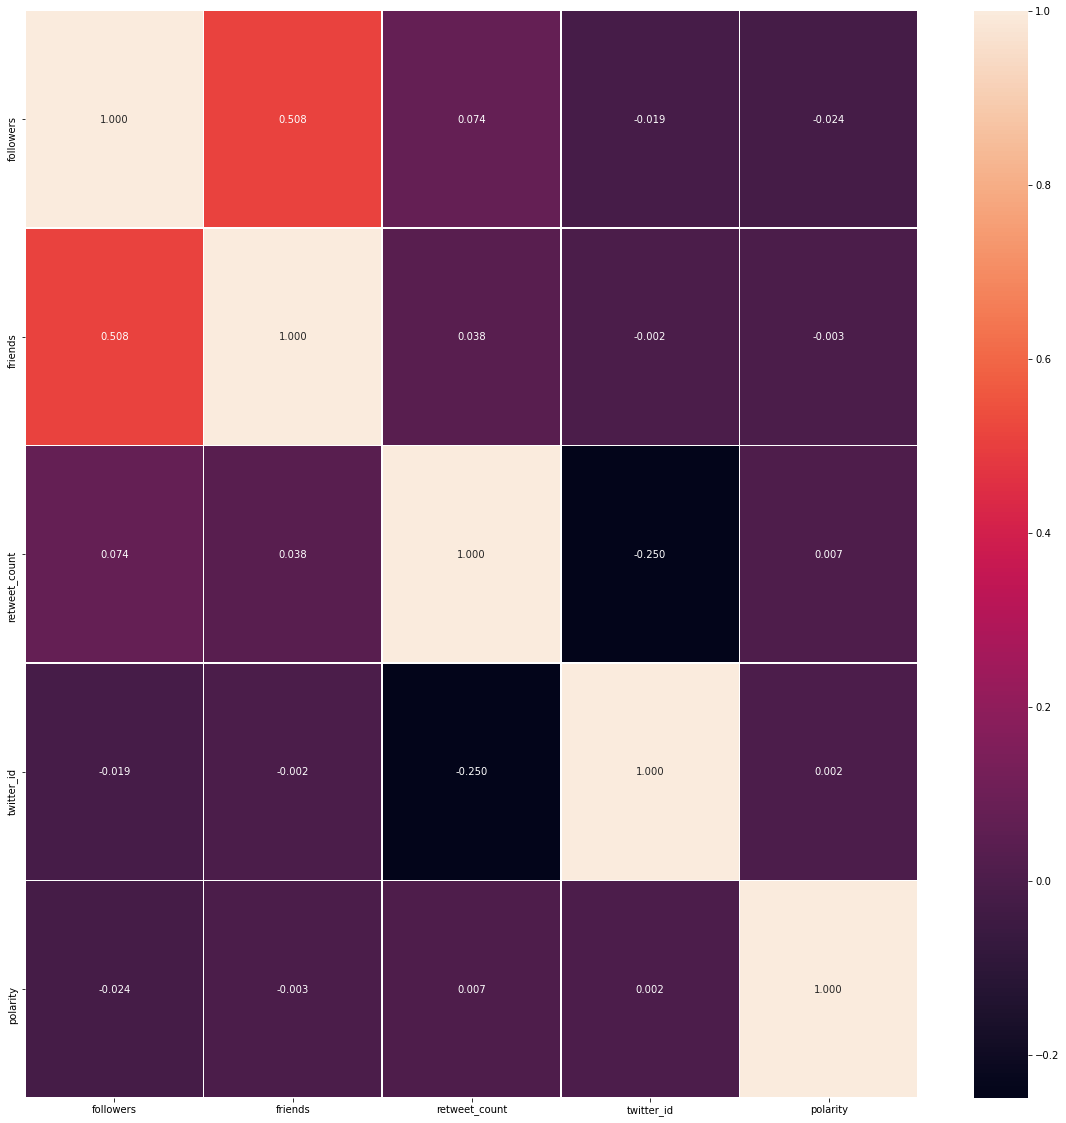

In [5]:
#Mapping Correlations
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

## Data Preperation

1.Data Cleaning

In [18]:

#Mengeliminasi kolom yang tidak digunakan
twit_data = data_twit.drop(['created_at', 'followers', 'friends', 'group_name', 'location', 'retweet_count', 'screenname', 'search_query',  'twitter_id', 'partition_0', 'partition_1', 'username'], axis = 1)

In [20]:
twit_data.head(10)

,file_name,text,polarity
0,AMD,Been on holiday so back now. Gonna try get som...,-0.3102
1,AMD,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,0.0000
2,AMD,The Beast #StrixGA35 comes packed with Up to A...,0.0000
3,AMD,Recently purchased everything for my first per...,0.0000
4,AMD,RT @LinuxReviews: #Linux architect Linus Torva...,-0.3612
5,AMD,RT @RedGamingTech: #Zen 3 #EPYC Milan Sample L...,-0.3400
6,AMD,RT @RedGamingTech: #Zen 3 #EPYC Milan Sample L...,-0.3400
7,AMD,"#Linux architect Linus Torvalds: AVX512 Is ""A ...",-0.3612
8,AMD,RT @CollegeOptomUK: #ResearchWednesday: Lookin...,0.0000
9,AMD,Cast videos from Windows 10 PC and Surface to ...,0.4019


In [27]:
#Mengganti label file name menjadi company name
twit_dataset = twit_data.rename(columns={'file_name':'company_name'})

In [28]:
twit_dataset.head(10)

,company_name,text,polarity
0,AMD,Been on holiday so back now. Gonna try get som...,-0.3102
1,AMD,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,0.0000
2,AMD,The Beast #StrixGA35 comes packed with Up to A...,0.0000
3,AMD,Recently purchased everything for my first per...,0.0000
4,AMD,RT @LinuxReviews: #Linux architect Linus Torva...,-0.3612
5,AMD,RT @RedGamingTech: #Zen 3 #EPYC Milan Sample L...,-0.3400
6,AMD,RT @RedGamingTech: #Zen 3 #EPYC Milan Sample L...,-0.3400
7,AMD,"#Linux architect Linus Torvalds: AVX512 Is ""A ...",-0.3612
8,AMD,RT @CollegeOptomUK: #ResearchWednesday: Lookin...,0.0000
9,AMD,Cast videos from Windows 10 PC and Surface to ...,0.4019
